# Part 1: Data Collection and Inspection
Let's start with getting the datafile loan.csv.

In [2]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# reading data files
df = pd.read_csv('./loan.csv',encoding='utf-8',low_memory=False)

In [5]:
# Lets look at the encoding
# Note this part is take aprpx. 5 - 7 mins to run since is finding the charcter encoding 
rawdata = open('loan.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

KeyboardInterrupt: 

<font color=blue>We see the encoding is utf-8 using the chardet library so we will continue to use it for our analysis</font>

In [3]:
#Look at the loans head
print(df.head())

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade            ...              \
0   10.65%       162.87     B        B2            ...               
1   15.27%        59.83     C        C4            ...               
2   15.96%        84.33     C        C5            ...               
3   13.49%       339.31     C        C1            ...               
4   12.69%        67.79     B        B5            ...               

  num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
0                NaN              

In [4]:
# inspect the structure
print(df.info(), "\n")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None 

(39717, 111)


<font color=blue>In the loan dataset we see there are 39717 observations and 111 variables.</font>

In [5]:
# Look if there are any missing values
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2458
emp_length                            0
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12939
purpose                               0
title                                10
zip_code                              0
addr_state                            0
dti                                   0


# Part 2 : Data Cleaning


<font color=blue>There are columns which have all missing values, lets get rid of these columns.</font>

In [6]:
# summing up the missing values (column-wise) in master_frame which do not have 100% missing values
Cols_NotNull = round(100*(df.isnull().sum()/len(df.index)), 2) != 100

In [7]:
# Columns having all missing values
df[Cols_NotNull.index[Cols_NotNull == False]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
mths_since_last_major_derog       0 non-null float64
annual_inc_joint                  0 non-null float64
dti_joint                         0 non-null float64
verification_status_joint         0 non-null float64
tot_coll_amt                      0 non-null float64
tot_cur_bal                       0 non-null float64
open_acc_6m                       0 non-null float64
open_il_6m                        0 non-null float64
open_il_12m                       0 non-null float64
open_il_24m                       0 non-null float64
mths_since_rcnt_il                0 non-null float64
total_bal_il                      0 non-null float64
il_util                           0 non-null float64
open_rv_12m                       0 non-null float64
open_rv_24m                       0 non-null float64
max_bal_bc                        0 non-null float64
all_util                          0 non-nul

<font color=blue>There are 54 columns with missing values</font>

In [8]:
# summing up the missing values (column-wise) in master_frame which do not have 100% missing values
Cols_NotNull = round(100*(df.isnull().sum()/len(df.index)), 2) != 100

In [9]:
# Excluding those columns have 100% missing data 
df = df[Cols_NotNull.index[Cols_NotNull == True]]

In [10]:
df.shape

(39717, 57)

In [11]:
# summing up the missing values (column-wise) in dataframe
round(100*(df.isnull().sum()/len(df.index)), 2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [12]:
#Lets look at the data 
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [13]:
# Unique values in the columns
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28821
emp_length                       12
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26528
purpose                          14
title                         19616
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [14]:
# Take closer look at the column with unique value 1 
df['tax_liens'].value_counts()

0.0    39678
Name: tax_liens, dtype: int64

<font color=blue>There are columns which have constant values, we will exclude such columns around 9.</font>

In [15]:
# Columns having more than one value
cols_unique = df.nunique() != 1
# See the count of columns having more than a single value
cols_unique.value_counts()

True     48
False     9
dtype: int64

In [16]:
# Include only the cols having more than a single value
df = df[cols_unique.index[cols_unique == True]]

In [17]:
df.shape

(39717, 48)

<font color=blue>If we inspect the data closely columns: ID, member_id, url, desc are of not much use. Even Zip_code is having xx characters so we will remove all these columns</font>

In [18]:
#drop columns id, member_id, url, desc, zip_code
df = df.drop(['id','member_id','url','desc','zip_code'],axis=1)

<font color=blue>recoveries and collection_recovery_fee are post charge off gross recovery and collection fee respectively. Hence , we can keep recoveries as its gross amount and remove collection_recovery_fee column.</font>

In [19]:
#drop column collection_recovery_fee 
df = df.drop(['collection_recovery_fee'],axis=1)

<font color=blue>total_pymnt_inv and total_pymnt is the payments received in portion and total payment received respectively. So we can keep the total_pymnt column for our analysis further and remove the column total_pymnt_inv.</font>

In [20]:
#drop column total_pymnt_inv
df = df.drop(['total_pymnt_inv'],axis=1)

<font color=blue>Also total_pymnt is sum of total_rec_prncp, total_rec_int, total_rec_late_fee and recoveries. So we can remove the 4 columns and keep total_pymt</font>

In [21]:
#drop columns total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries
df = df.drop(['total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries'],axis=1)

In [22]:
df.shape

(39717, 37)


<font color=blue>Lets look at the missing rows</font>

In [23]:
# sum it up to check how many rows have all missing values
df.isnull().all(axis=1).sum()

0

In [24]:
# look at the df info for number of rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 37 columns):
loan_amnt                 39717 non-null int64
funded_amnt               39717 non-null int64
funded_amnt_inv           39717 non-null float64
term                      39717 non-null object
int_rate                  39717 non-null object
installment               39717 non-null float64
grade                     39717 non-null object
sub_grade                 39717 non-null object
emp_title                 37259 non-null object
emp_length                39717 non-null object
home_ownership            39717 non-null object
annual_inc                39717 non-null float64
verification_status       39717 non-null object
issue_d                   39717 non-null object
loan_status               39717 non-null object
purpose                   39717 non-null object
title                     39707 non-null object
addr_state                39717 non-null object
dti                       

In [25]:
#rows have more than 3 missing values
# calculate the percentage
100*(len(df[df.isnull().sum(axis=1) > 3].index) / len(df.index))

3.8925397185084476

<font color=blue>Thus, about 4% rows have more than 3 missing values. Let's remove these rows and count the number of missing values remaining.</font>


In [26]:
# retaining the rows having <= 3 NaNs
df = df[df.isnull().sum(axis=1) <= 3]

# look at the summary again
round(100*(df.isnull().sum()/len(df.index)), 2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  2.60
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
title                      0.01
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq    63.25
mths_since_last_record    92.70
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.03
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_py

In [27]:
df.shape

(38171, 37)

In [28]:
# Lets see the missing values for last_pymnt_d
df[df['last_pymnt_d'].isnull()]['loan_status']

3613     Charged Off
6253     Charged Off
6967     Charged Off
7137     Charged Off
8429     Charged Off
11703    Charged Off
11860    Charged Off
12026    Charged Off
12739    Charged Off
14642    Charged Off
14871    Charged Off
17913    Charged Off
18316    Charged Off
18332    Charged Off
24469    Charged Off
27644    Charged Off
28155    Charged Off
29635    Charged Off
30297    Charged Off
32760    Charged Off
35186    Charged Off
36937    Charged Off
Name: loan_status, dtype: object

<font color=blue>When last_pymnt_d is null which means the loan status was charged off(defaulted) and hence last payment date has missing values. We will not remove the missing values for last_pymnt_d else we will also loose the Charged Off values in loan_status.</font>

In [29]:
df.shape

(38171, 37)

In [30]:
# fraction of rows lost
len(df.index)/39717

0.9610746028149155

<font color=blue>Thus, we have lost about 4% observations in cleaning the missing values.</font>

# Part 3: Type Derived metrics

We shall create Type Driven Derived metrics for: <br\>
analyzing the numerical values by Binning them into groups.<br\>
analysing issue month from issue date.

### Create bins for Annual Income

In [31]:
# Take a look at the spread of the data to see the min and max values
pd.options.display.float_format = "{:.2f}".format
df['annual_inc'].describe()

count     38171.00
mean      69099.11
std       63864.98
min        4000.00
25%       41000.00
50%       60000.00
75%       82545.90
max     6000000.00
Name: annual_inc, dtype: float64

In [32]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 20000, 40000, 60000, 80000, 100000, 120000, 6000000]
# Define the lables
bucket = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000', 'Above 120000']
# Using the cut function lets create the bins
df['annual_inc_bins'] = pd.cut(df['annual_inc'], bins=cutpoints, labels=bucket)

### Create bins for Loan Amount

In [33]:
# Take a look at the spread of the data to see the min and max values
df['loan_amnt'].describe()

count   38171.00
mean    11250.04
std      7432.62
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [34]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 5000, 10000, 15000, 20000 , 35000]
# Define the lables
bucket = ['0-5000', '5000-10000', '10000-15000', '15000-20000', 'Above 20000']
# Using the cut function lets create the bins
df['loan_amnt_bins'] = pd.cut(df['loan_amnt'], bins=cutpoints, labels=bucket)

### Create bins for Installment

In [35]:
df['installment'].describe()

count   38171.00
mean      325.26
std       207.88
min        15.69
25%       167.79
50%       281.56
75%       431.14
max      1305.19
Name: installment, dtype: float64

In [36]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 200, 400, 600, 800, 1306]
# Define the lables
bucket = ['0-200', '200-400', '400-600', '600-800', 'Above 800']
# Using the cut function lets create the bins
df['installment_bins'] = pd.cut(df['installment'], bins=cutpoints, labels=bucket)

### Extracting issue month from issue date

In [37]:
df['issue_d_month'] = df['issue_d'].apply(lambda x: x.split('-')[0])

### Create bins for number of months since the borrower's last delinquency

In [38]:
df['mths_since_last_delinq'].describe()

count   14027.00
mean       35.91
std        22.02
min         0.00
25%        18.00
50%        34.00
75%        52.00
max       120.00
Name: mths_since_last_delinq, dtype: float64

In [39]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 20, 40, 60, 80, 100, 120]
# Define the lables
bucket = ['0-20', '20-40', '40-60', '60-80','80-100','Above 100']
# Using the cut function lets create the bins
df['mths_since_last_delinq_bins'] = pd.cut(df['mths_since_last_delinq'], bins=cutpoints, labels=bucket)

### Create bins for number of months since the last public record

In [40]:
df['mths_since_last_record'].describe()

count   2785.00
mean      69.72
std       43.81
min        0.00
25%       22.00
50%       90.00
75%      104.00
max      129.00
Name: mths_since_last_record, dtype: float64

In [41]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 20, 40, 60, 80, 100, 129]
# Define the lables
bucket = ['0-20', '20-40', '40-60', '60-80','80-100','Above 100']
# Using the cut function lets create the bins
df['mths_since_last_record_bins'] = pd.cut(df['mths_since_last_record'], bins=cutpoints, labels=bucket)

### Create bins for open_account

In [42]:
df['open_acc'].describe()

count   38171.00
mean        9.33
std         4.40
min         2.00
25%         6.00
50%         9.00
75%        12.00
max        44.00
Name: open_acc, dtype: float64

In [43]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 10, 20, 30, 40, 50]
# Define the lables
bucket = ['0-10', '10-20', '20-30', '30-40','Above 40']
# Using the cut function lets create the bins
df['open_acc_bins'] = pd.cut(df['open_acc'], bins=cutpoints, labels=bucket)

### Create bins for revolving balance

In [44]:
df['revol_bal'].describe()

count    38171.00
mean     13371.01
std      15706.61
min          0.00
25%       3747.00
50%       8899.00
75%      17097.00
max     149588.00
Name: revol_bal, dtype: float64

In [45]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 30000, 60000, 90000, 120000 , 150000]
# Define the lables
bucket = ['0-30000', '30000-60000', '60000-90000', '90000-120000', 'Above 120000']
# Using the cut function lets create the bins
df['revol_bal_bins'] = pd.cut(df['revol_bal'], bins=cutpoints, labels=bucket)

### Create bins for revolving util percentage

In [46]:
df['revol_util'].describe()

count     38159
unique     1088
top          0%
freq        924
Name: revol_util, dtype: object

In [47]:
df['revol_util']= df['revol_util'].apply(lambda x : str(x).rstrip('%'))
df['revol_util']= df['revol_util'].apply(lambda x : str(x).split('.')[0])
df['revol_util']= df['revol_util'].apply(lambda x : str(x).replace('nan','0'))
df['revol_util'] = df['revol_util'].astype('int')

# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# Define the lables
bucket = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', 'Above 90']
# Using the cut function lets create the bins
df['revol_util_bins'] = pd.cut(df['revol_util'], bins=cutpoints, labels=bucket)

### Create bins for Dti

In [48]:
df['dti'].describe()

count   38171.00
mean       13.36
std         6.66
min         0.00
25%         8.26
50%        13.46
75%        18.62
max        29.99
Name: dti, dtype: float64

In [49]:
### Create bins for Dti
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 5, 10, 15, 20, 25, 30, 35]
# Define the lables
bucket = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', 'Above 30']
# Using the cut function lets create the bins
df['dti_bins'] = pd.cut(df['dti'], bins=cutpoints, labels=bucket)

 # Part 4: Univariate analysis on Categorical variables

We will analyse the categorical variables Loan Status , Term, Home Ownership, Emp Length, Purpose and Address State, Verification Status.

### Loan Term

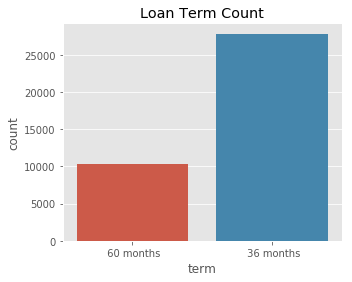

In [50]:
# plot style used is ggplot used similar in R
plt.style.use('ggplot')
plt.figure(figsize= (5,4))
# frequency plot
sns.countplot(x="term", data=df)
plt.title("Loan Term Count")
#counts
df['term'].value_counts()
# To save the fig to file
plt.savefig('Plot1.png')

<font color=blue>Term is the duration of the loan payments. There are 29096 borrowers with 36 months term.</font>

### Loan Status


<br /><font color=blue>Target variable is Loan Status as it has information about loan paid, current and Charged Off(default).</font>

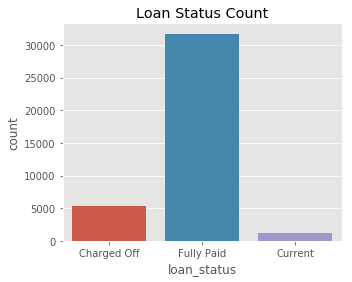

In [51]:
plt.figure(figsize= (5,4))
plt.title("Loan Status Count")
sns.countplot(x="loan_status", data=df)
# to show value counts
df['loan_status'].value_counts()
# To save the fig to file
plt.savefig('Plot2.png')

<font color=blue>The status of the loan could be Fully paid, Charged Off or Current.

Around, 5627 borrowers were Charged Off i.e. defaulters to pay back the loan.</font>

### Purpose

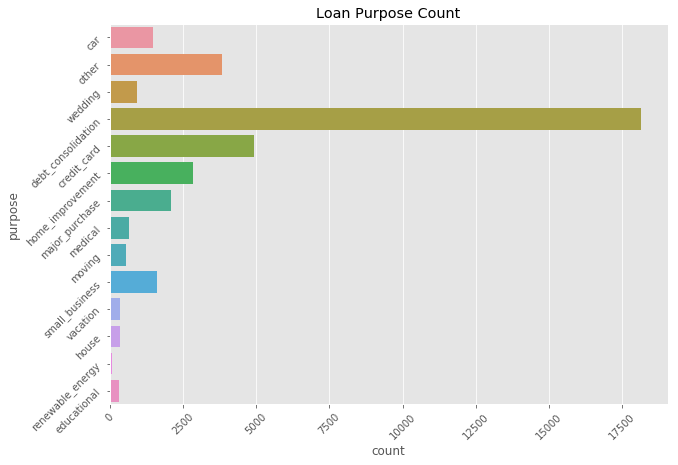

In [52]:
plt.figure(figsize= (10,7))
sns.countplot(y="purpose", data=df)
plt.title("Loan Purpose Count")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# to show value counts
df['purpose'].value_counts()
# To save the fig to file
plt.savefig('Plot3.png')


<font color=blue>Purpose is reason which the loan is borrowed.

We observe around 18641 number of brrowers are for debt consolidation i.e. to reduce the their own debt.</font>

### Emp Length

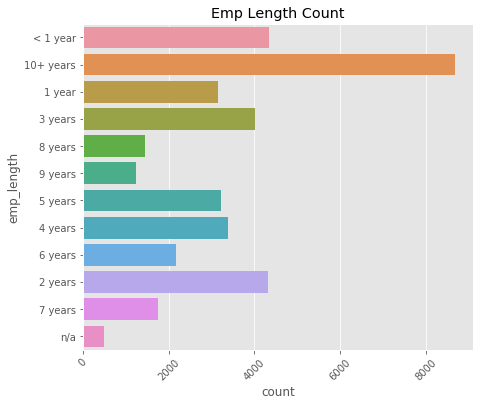

In [53]:
plt.figure(figsize= (7,6))
sns.countplot(y="emp_length", data=df)
plt.title("Emp Length Count")
plt.xticks(rotation=45)
df['emp_length'].value_counts()
# To save the fig to file
plt.savefig('Plot4.png')

<font color=blue>Emp_length is experience of borrower in years. The number of borrowers with greater than 10+ years of experience are the highest around 8879.</font>

### Annual Income

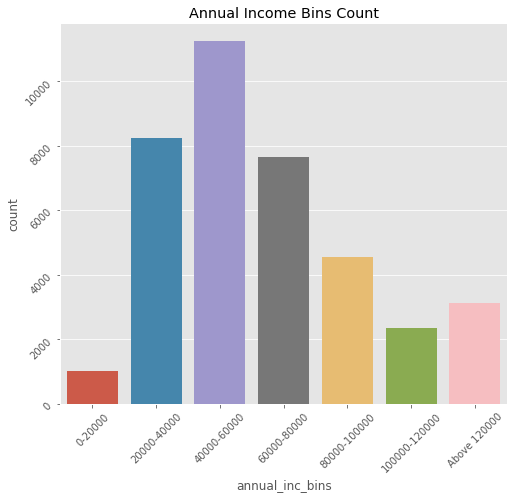

In [54]:
plt.figure(figsize= (8,7))
sns.countplot(x="annual_inc_bins", data=df)
plt.yticks(rotation=45)
plt.title("Annual Income Bins Count")
plt.xticks(rotation=45)
# To save the fig to file
plt.savefig('Plot5.png')

<font color=blue>The number of borrowers with annual income range 40000-60000 are the highest around 11500.</font>

### Loan Amount

5000-10000     32.70%
0-5000         23.76%
10000-15000    20.31%
15000-20000    11.65%
Above 20000    11.57%
Name: loan_amnt_bins, dtype: object

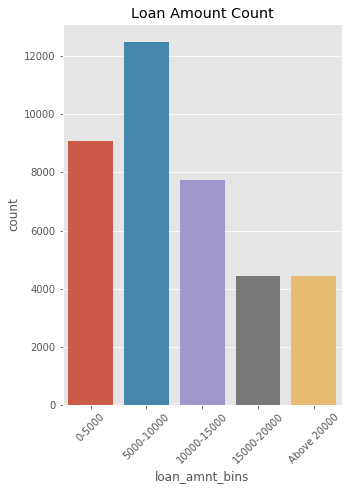

In [55]:
plt.figure(figsize= (5,7))
sns.countplot(x="loan_amnt_bins", data=df)
plt.xticks(rotation=45)
plt.title('Loan Amount Count')
plt.savefig('Plot6.png')
(df['loan_amnt_bins'].value_counts()/df['loan_amnt_bins'].count()).map(lambda x: '{:,.2%}'.format(x))

<font color=blue>The number of borrowers with loan ammount range 5000-10000 are the highest around 32%.</font>

### Installments

200-400      38.43%
0-200        33.13%
400-600      17.43%
600-800       6.97%
Above 800     4.04%
Name: installment_bins, dtype: object

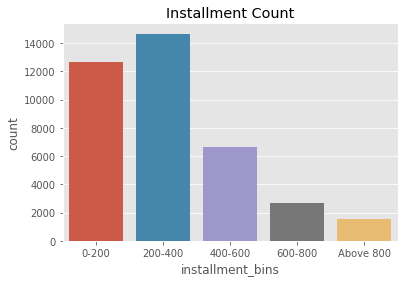

In [56]:
sns.countplot(x="installment_bins", data=df)
plt.title("Installment Count")
(df['installment_bins'].value_counts()/df['installment_bins'].count()).map(lambda x: '{:,.2%}'.format(x))

<font color=blue>The number of borrowers with Installment range 200-400 are the highest around 38%.</font>

### Loan Issue Month

Dec    11.08%
Nov    10.45%
Oct     9.88%
Sep     9.23%
Aug     8.91%
Jul     8.78%
Jun     8.28%
May     7.62%
Apr     7.16%
Mar     6.76%
Jan     5.95%
Feb     5.90%
Name: issue_d_month, dtype: object

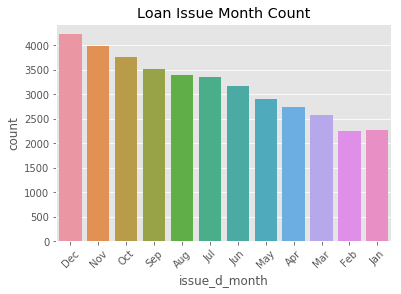

In [57]:
sns.countplot(x="issue_d_month", data=df)
plt.xticks(rotation=45)
plt.title("Loan Issue Month Count")
(df['issue_d_month'].value_counts()/df['issue_d_month'].count()).map(lambda x: '{:,.2%}'.format(x))

<font color=blue>Most no of loan issued towards end of year with increasing number .</font>

<font color=blue>Now lets look at the Quantitative Variables Loan Amount, Installment, Annual Income, Interest rate and dti.</font>

# Part 5: Univariate Analysis Quantitative variables

### Loan Amount

Text(0.5,1,'Loan Amnt Boxplot')

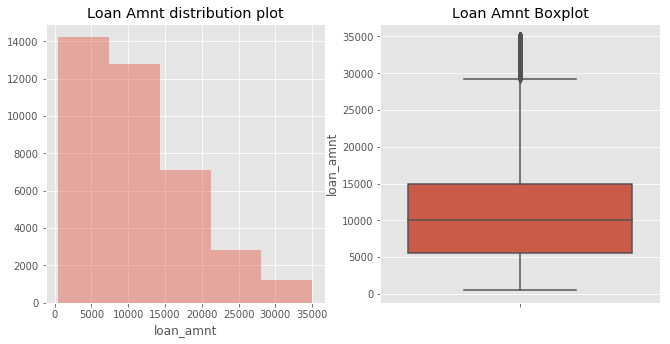

In [58]:
plt.figure(figsize= (11,5))
plt.subplot(121)
g = sns.distplot(df['loan_amnt'],bins=5,kde = False)
plt.title("Loan Amnt distribution plot")

plt.subplot(122)
g1 = sns.boxplot(y=df['loan_amnt'])
plt.subplots_adjust(wspace=.2, hspace = 0.3 , top = 0.9)
plt.title("Loan Amnt Boxplot")

<font color=blue>The distribution plot shows us the skewness towards the right.<br /> The Loan amount spread is around 9500 (i.e. IQR, interquartile difference).<br />Outliers are 3.5 * IQR</font>

### Installment

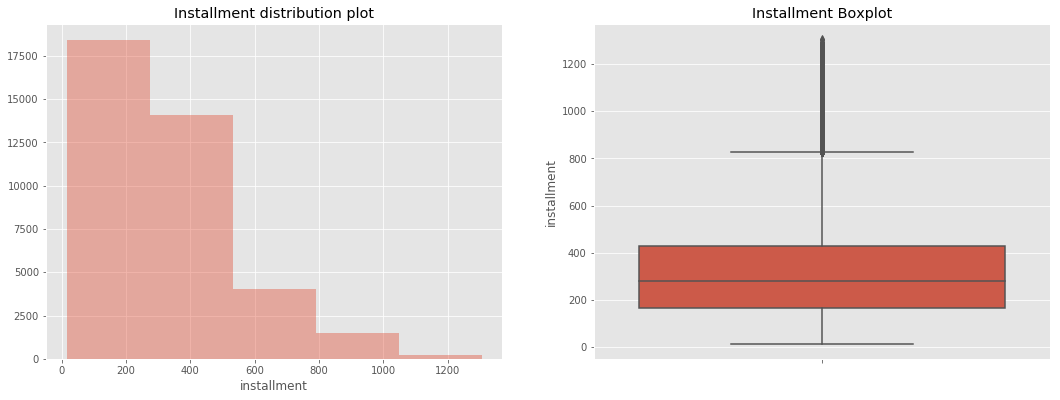

In [59]:
plt.figure(figsize= (18,6))
plt.subplot(121)
g = sns.distplot(df['installment'],bins=5,kde = False)
plt.title("Installment distribution plot")

plt.subplot(122)
g1 = sns.boxplot(y=df['installment'])
plt.title("Installment Boxplot")

plt.subplots_adjust(wspace=.2, hspace = 0.3 , top = 0.9)

<font color=blue>The distribution plot shows us the skewness towards the right.<br /> The Installment amount spread is around 263 (i.e. IQR, interquartile difference).<br />Outliers are 3.5 * IQR</font>

### Annual income

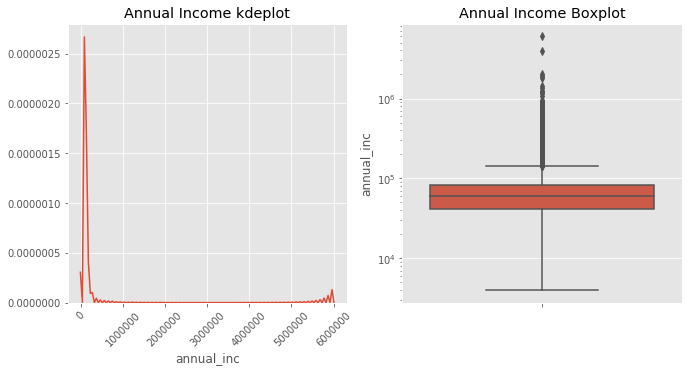

In [60]:
plt.figure(figsize= (11,5))
plt.subplot(121)
g = sns.distplot(df['annual_inc'],hist = False)
plt.title("Annual Income kdeplot")
plt.xticks(rotation=45)


plt.subplot(122)
g1 = sns.boxplot(y=df['annual_inc'])
g1 = plt.yscale('log')
plt.title("Annual Income Boxplot")

plt.subplots_adjust(wspace=.2, hspace = 0.6 , top =0.9)

<font color=blue><br /> The Annual Income spread is around 41900 (i.e. IQR, interquartile difference).<br />Outliers are 6 * IQR.</font>

### Interest rate

In [61]:
# check the data type of int_rate
type(df['int_rate'].iloc[0])

str

C:\Users\YUVRAJ SHINDE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


Text(0.5,1,'Interest Rate Count')

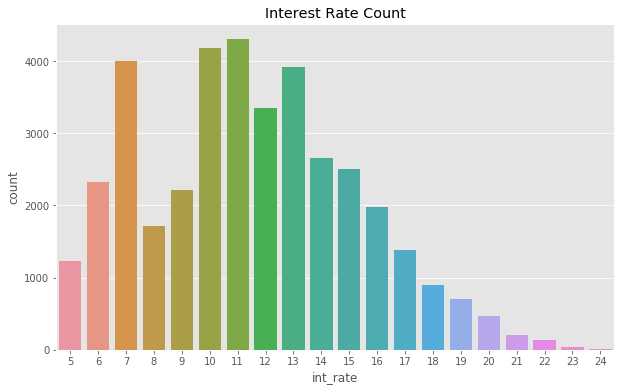

In [62]:
#Interest Rate

# Remove the % symbol
df['int_rate'] = df['int_rate'].str.extract('(\d+)')

# Change the data type to integer
df['int_rate'] = df['int_rate'].astype('int')

# Look at the count of interest rate
plt.figure(figsize= (10,6))
sns.countplot(df['int_rate'])
plt.title('Interest Rate Count')

<font color=blue>Most number of borrowers are charged 11% interest rate</font>

### dti  is Ratio of dept payments to monthly income

Text(0.5,1,'dti: Distribution Plot')

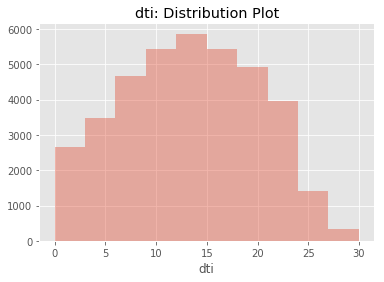

In [63]:
sns.distplot(df['dti'], bins =10, kde = False)
plt.title("dti: Distribution Plot")

In [64]:
# summary metric
df['dti'].describe()

count   38171.00
mean       13.36
std         6.66
min         0.00
25%         8.26
50%        13.46
75%        18.62
max        29.99
Name: dti, dtype: float64

<font color=blue> The Mean value for dti is almost equal to the Median value around 13. A closer look at the distribution plot shows its symmertic in nature.</font>


# Part 6 :Bivariate Analysis on Loan Status. 

## We will now analyse distribution of loan status against other variables

### Loan Status distribution by Purpose

Text(0.5,1,'Loan Status distribution by Purpose')

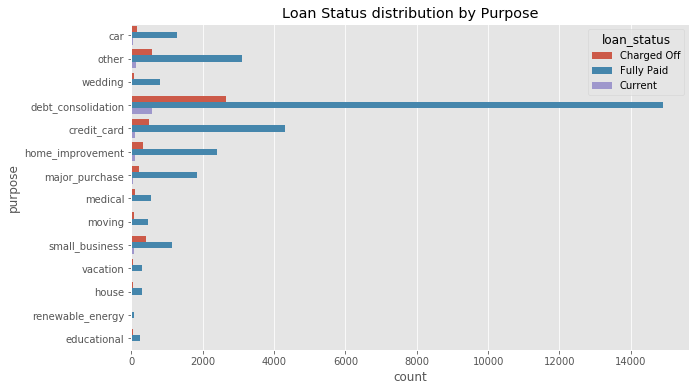

In [65]:
plt.figure(figsize= (10,6))
sns.countplot(y= 'purpose',hue='loan_status',  data = df)
plt.title("Loan Status distribution by Purpose")
#plt.xticks(rotation=-90)

In [66]:
df[df['loan_status']=='Charged Off'].groupby('purpose')['loan_status'].count()

purpose
car                    155
credit_card            505
debt_consolidation    2660
educational             51
home_improvement       324
house                   55
major_purchase         207
medical                100
moving                  85
other                  593
renewable_energy        17
small_business         417
vacation                52
wedding                 87
Name: loan_status, dtype: int64

<font color=blue>The highest count for Charged Off is for purpose debt_consolidation around 2660. </font>

### Loan Status distribution by Addr State

Text(0.5,1,'Loan Status distribution by Addr State')

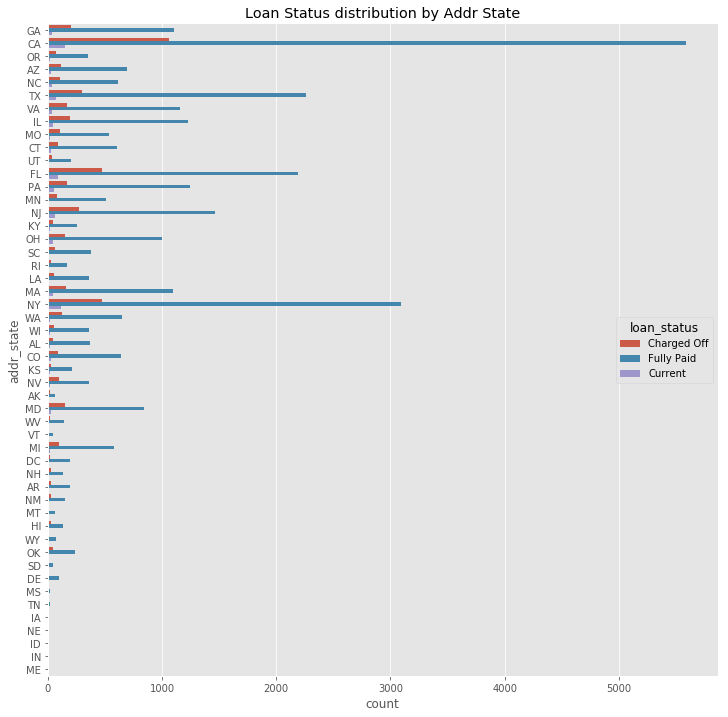

In [67]:
plt.figure(figsize= (12,12))
sns.countplot(y="addr_state",hue=(df['loan_status']),data=df)
plt.title("Loan Status distribution by Addr State")

In [68]:
df[df['loan_status']=='Charged Off'].groupby('addr_state')[['loan_status']].count().sort_values('loan_status',ascending=False).head(1)

,loan_status
addr_state,
CA,1058


<font color=blue>Most borrowers are from the State CA. The Charged Off count in the State CA is 1058.</font>


###  Loan Status distribution by Home Ownership

Text(0.5,1,'Loan Status distribution by Home Ownership')

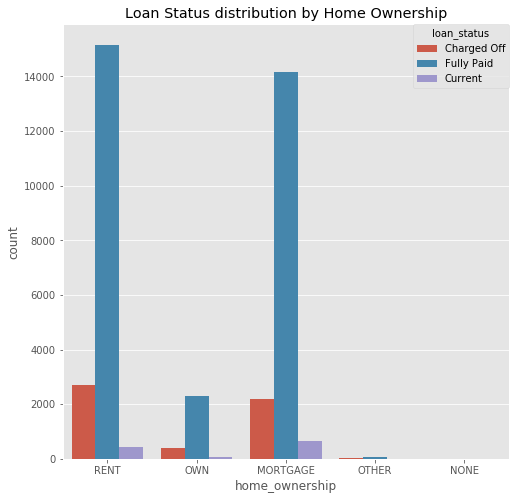

In [69]:
plt.figure(figsize= (8,8))
sns.countplot(x="home_ownership",hue='loan_status', data=df)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.,title='loan_status')
plt.title("Loan Status distribution by Home Ownership")

In [70]:
# Lets look at count of home ownership borrowers 
df[df['loan_status']=='Charged Off'].groupby('home_ownership')[['loan_status']].count().sort_values('loan_status',ascending=False).head(1)

,loan_status
home_ownership,
RENT,2688


<font color=blue>More number of borrowers have home ownership as RENT and the count of borrowers with home ownership as RENT and who default is also highest around 2688. </font>

### Loan Status distribution by Emp Length

Text(0.5,1,'Loan Status distribution by Emp Length')

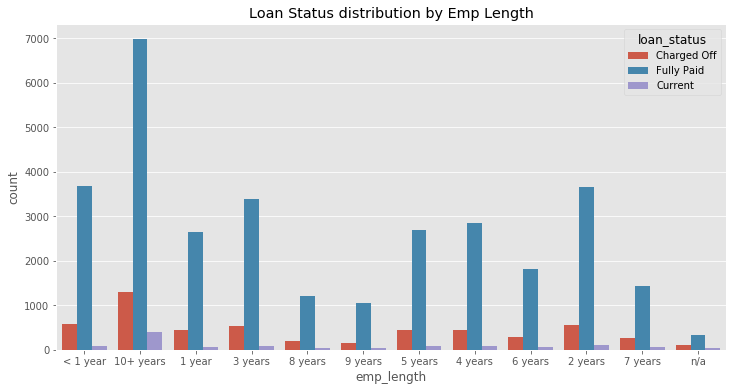

In [71]:
plt.figure(figsize= (12,6))
sns.countplot(x="emp_length",hue='loan_status', data=df)
plt.title("Loan Status distribution by Emp Length")

In [72]:
df[df['loan_status']=='Charged Off'].groupby('emp_length')[['loan_status']].count().sort_values('loan_status',ascending=False).head(1)

,loan_status
emp_length,
10+ years,1297


<font color=blue>The number of borrowers who defaulted is highest for 10+ years of experience around 1297.</font>

### Loan status distribution by Annual Income and Verification Status

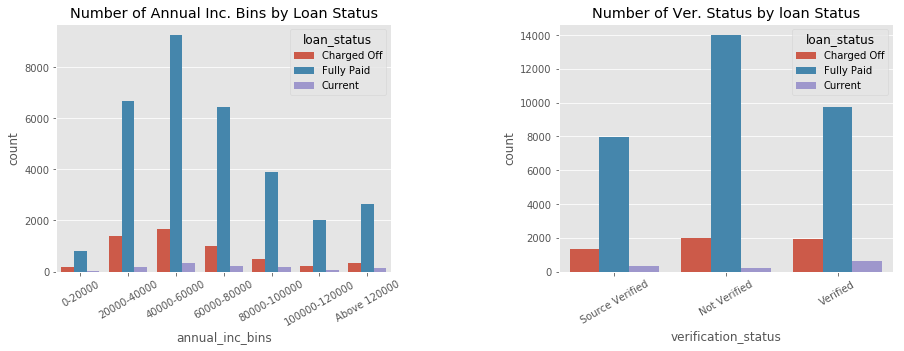

In [73]:
# adjust figure size
plt.figure(figsize=(15,12))

# subplot 2: Annual Income
plt.subplot(2, 2, 1)
sns.countplot(x="annual_inc_bins",hue='loan_status', data=df)
plt.title("Number of Annual Inc. Bins by Loan Status")
plt.xticks(rotation=30)

# subplot 3: Installment
plt.subplot(2, 2, 2)
sns.countplot(x="verification_status",hue='loan_status', data=df)
plt.title('Number of Ver. Status by loan Status')
plt.xticks(rotation=30)

plt.subplots_adjust(wspace=.5, hspace = 0.7 , top = 0.9)

In [74]:
df[df['loan_status']=='Charged Off'].groupby('annual_inc_bins')[['loan_status']].count().sort_values('loan_status',ascending=False).head(1)

,loan_status
annual_inc_bins,
40000-60000,1648


In [75]:
df[df['loan_status']=='Charged Off'].groupby('verification_status')[['loan_status']].count().sort_values('loan_status',ascending=False).head(1)

,loan_status
verification_status,
Not Verified,1992


<font color=blue>Verification_status indicates if Income was verified or not.<br /> 


  The number of borrowers who defaulted is highest for annual income range 40000-60000 around 1648.<br /> 


The number of borrowers who Defaulted is highest for Not Verifed around 1992</font>

### Loan status distribution by Number of open accounts (credit lines)

,loan_status
open_acc,
7,519
8,513
6,508
9,490


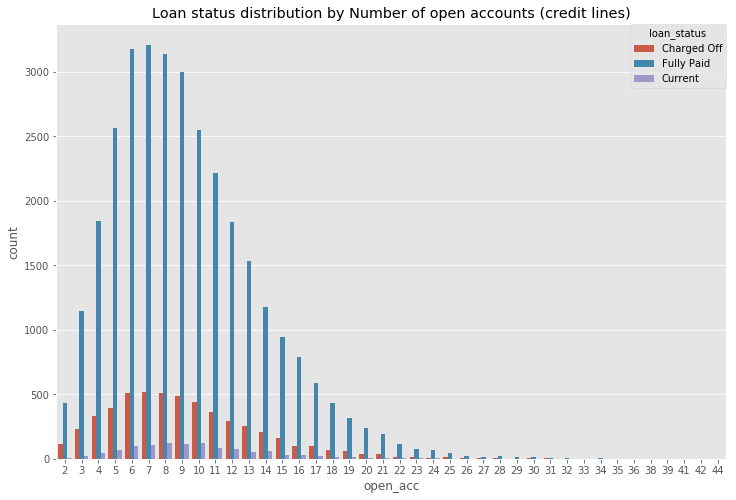

In [76]:
plt.figure(figsize= (12,8))
sns.countplot(x="open_acc",hue='loan_status', data=df)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.,title='loan_status')
plt.title("Loan status distribution by Number of open accounts (credit lines)")

df[df['loan_status']=='Charged Off'].groupby('open_acc')[['loan_status']].count().sort_values('loan_status',ascending=False).head(4)

<font color=blue>The number of borrowers and number of defaulters rise for number of open accounts from 0 to 7 with highest number of defaulters at open accounts of 7 and it reduces from number of open accounts of 8 and onwards and we observe skewness to the right of the distribution.</font>

<font color=blue><br />
We have analysed till now variables Term , Loan Status, Emp length, Home ownership, State Addr, Purpose, Annual Income, no of open account.<br />  Since Target variable is Loan Status to find if the borrower defaulted, we also looked at the these variables by Loan Status to understand the driving variables for loan defaulters.                        
<br /> 
Thus, we can make an understanding that Variables <br />Emp length, <br />Home ownership, <br />State Addr, <br />Purpose, <br />Annual Income <br /> No of open accounts<br />are the Borrowers' Chracteristics which are vital for the lender to consider for loan approval. </font>

# Part 7: Bivariate Analysis on Continuous Variables

### Correlation of numeric columns

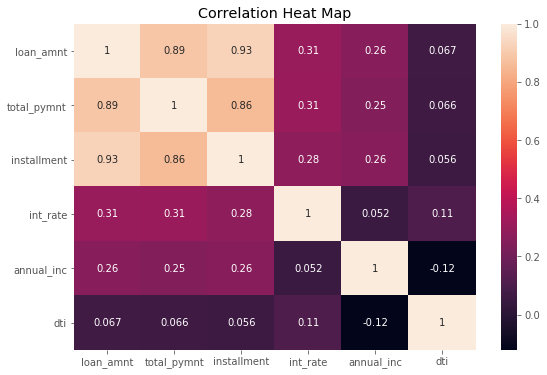

In [77]:
corr = df[['loan_amnt','total_pymnt','installment','int_rate','annual_inc','dti']].corr()
plt.figure(figsize= (9,6))
plt.title("Correlation Heat Map")
g = sns.heatmap(corr,annot=True)

<font color=blue>Loan Amount and Installment have strong positive correlation.<br />Loan Amount and total_pymnt have strong positive correlation.<br /> total_pymnt have positive correlation with installment</font>

# Part 8: Multivariate Analysis on Continuous vs Categorical Variables

### Loan Status for loan_amnt, annual_inc, installment and int_rate

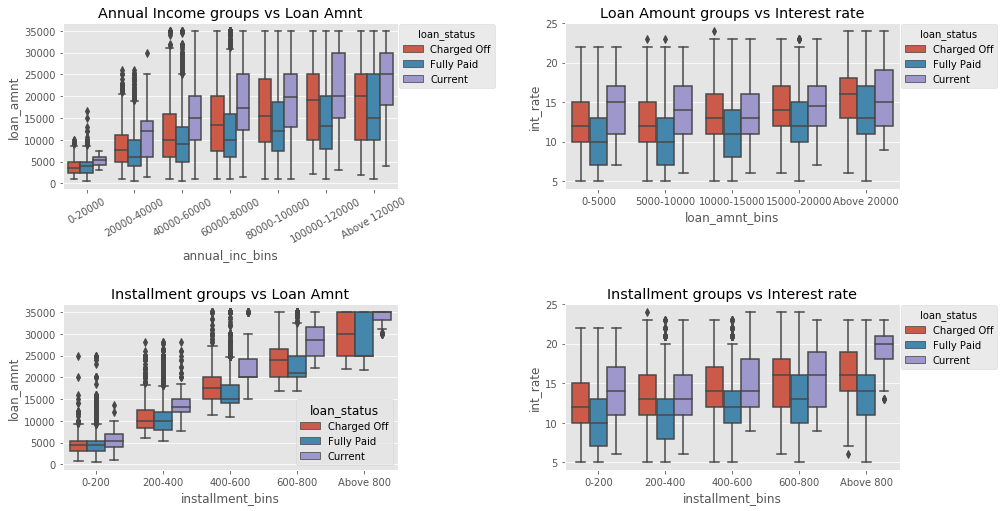

In [78]:
# adjust figure size
plt.figure(figsize=(15, 8))

# subplot 1: Annual Income
plt.subplot(2, 2, 1)
sns.boxplot(x='annual_inc_bins', y='loan_amnt',hue='loan_status', data=df)
plt.title("Annual Income groups vs Loan Amnt")
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.1,title='loan_status')

# subplot 2: Loan Amount
plt.subplot(2, 2, 2)
sns.boxplot(x='loan_amnt_bins', y='int_rate',hue='loan_status', data=df)
plt.title("Loan Amount groups vs Interest rate")
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.1,title='loan_status')

# subplot 3: Installment
plt.subplot(2, 2, 3)
sns.boxplot(x='installment_bins',y='loan_amnt',hue='loan_status' , data=df)
plt.title("Installment groups vs Loan Amnt")
           
# subplot 4: Interest Rate
plt.subplot(2, 2, 4)
ax1 =sns.boxplot(x='installment_bins', y='int_rate',hue='loan_status', data=df)
plt.title("Installment groups vs Interest rate")
plt.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=0.1,title='loan_status')
#plt.yscale('log')

plt.subplots_adjust(wspace=.5, hspace = 0.7 , top = 0.9)


<font color=blue>Annual Income groups vs Loan Amnt: The variation in loan amount increases as Income groups increase for Charged Off.<br /> Installment groups vs Loan Amnt: As installment increases we see the loan amount also increases, though the variation is high for installments Above 1000 where the Charged Off.                     
<br /></font>

<font color=blue>We have analysed the continuous variables Loan Amount, Installment, Annual Income and Interest rate.<br />  We also looked at the these variables by Loan Status to understand the defaulters by creating bins of the numerical variables.                        
<br /> 
Thus, we can make an understanding that Variables <br />Loan Amount, <br />Installment, <br />Annual Income, <br />Interest rate <br />are the Lenders parameters which are vital for the lender to consider for loan approval.<br /> The Lender also evaluates the loan approval by <br />dti, <br />Grade, <br />Term and <br />Verification Status. </font>

# Part 9 : Data and Business Driven Derived Metrics

### Data Derived Metric: Charge Off %

### Lets Derive the Charge Off % Metric as number of loan status as Charged Off to all the loan status for Categories like Grade, purpose, emp length term and verification.

### Charge Off % = Number of Loan Status Charged Off by Category/Number of Loan Status(all status) by category

### Lets calculate the Charge Off % for Borrowers characteristics:
#### Basic characteristics like:
##### Home ownership type
##### Length of employment
##### Addr state
##### Purpose of loan
##### Annual Income

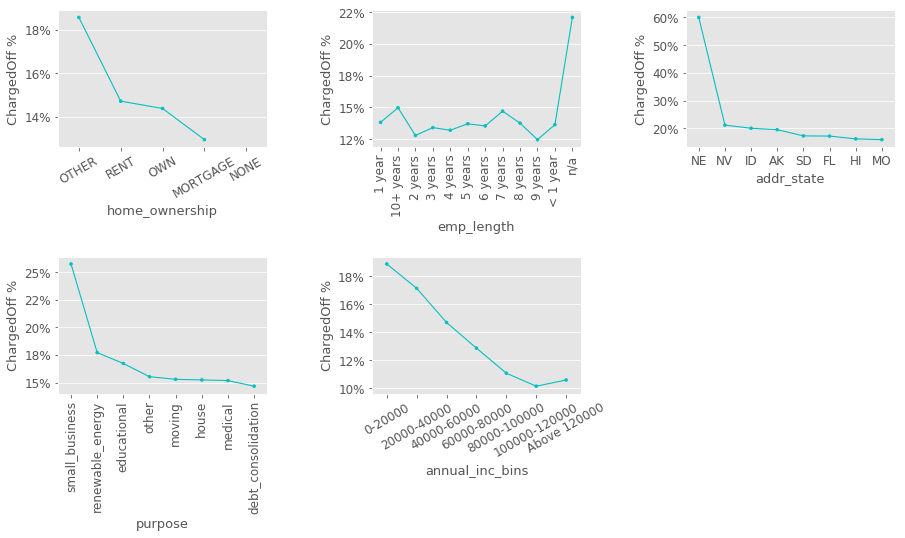

In [79]:
# adjust figure size
plt.figure(figsize=(15, 10))

# subplot 1: 
plt.subplot(3, 3, 1)
# Calculate Charged off % by home_ownership for top 8
ChgOff_hom= (df[df['loan_status']=='Charged Off'].groupby(by=['home_ownership'])[['loan_status']].count()/\
df.groupby(by=['home_ownership'])[['loan_status']].count()).sort_values('loan_status',ascending=False)
ChgOff_hom=ChgOff_hom.reset_index()
ChgOff_hom.rename(columns={"loan_status": "Charged off %"},inplace=True)
#plt.figure(figsize=(8,8))
g=sns.pointplot(x='home_ownership',y='Charged off %',data=ChgOff_hom,color='c',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("home_ownership",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y))) 

# subplot 2: 
plt.subplot(3, 3, 2)
# Calculate Charged off % by emp_length 
ChgOff_emplength= (df[df['loan_status']=='Charged Off'].groupby(by=['emp_length'])[['loan_status']].count()/\
df.groupby(by=['emp_length'])[['loan_status']].count()) 
ChgOff_emplength=ChgOff_emplength.reset_index()
ChgOff_emplength.rename(columns={"loan_status": "Charged off %"},inplace=True)
#plt.figure(figsize=(5,5))
g=sns.pointplot(x='emp_length',y='Charged off %',data=ChgOff_emplength,color='c',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=90)
g.set_xlabel("emp_length",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y))) 

# subplot 3: 
plt.subplot(3, 3, 3)
# Calculate Charged off % by addr_state for top 8
ChgOff_addr= (df[df['loan_status']=='Charged Off'].groupby(by=['addr_state'])[['loan_status']].count()/\
df.groupby(by=['addr_state'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(8) 
ChgOff_addr=ChgOff_addr.reset_index()
ChgOff_addr=ChgOff_addr.reset_index()
ChgOff_addr.rename(columns={"loan_status": "Charged off %"},inplace=True)
#plt.figure(figsize=(8,8))
g=sns.pointplot(x='addr_state',y='Charged off %',data=ChgOff_addr,color='c',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=0)
g.set_xlabel("addr_state",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))

# subplot 4: 
plt.subplot(3, 3, 4)
# Calculate Charged off % by Purpose for top 8
ChgOff_purpose= (df[df['loan_status']=='Charged Off'].groupby(by=['purpose'])[['loan_status']].count()/\
df.groupby(by=['purpose'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(8) 
ChgOff_purpose=ChgOff_purpose.reset_index()
ChgOff_purpose=ChgOff_purpose.reset_index()
ChgOff_purpose.rename(columns={"loan_status": "Charged off %"},inplace=True)
g=sns.pointplot(x='purpose',y='Charged off %',data=ChgOff_purpose,color='c',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=90)
g.set_xlabel("purpose",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))


# subplot 5: 
plt.subplot(3, 3, 5)
# Calculate Charged off % by annual income bins 
ChgOff_inc= (df[df['loan_status']=='Charged Off'].groupby(by=['annual_inc_bins'])[['loan_status']].count()/\
df.groupby(by=['annual_inc_bins'])[['loan_status']].count()).sort_values('loan_status',ascending=False)
ChgOff_inc=ChgOff_inc.reset_index()
ChgOff_inc.rename(columns={"loan_status": "Charged off %"},inplace=True)
g=sns.pointplot(x='annual_inc_bins',y='Charged off %',data=ChgOff_inc,color='c',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("annual_inc_bins",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))


# subplot 3:#plt.subplot(3, 3, 6)

plt.subplots_adjust(wspace=.5, hspace = 0.8 , top = 1.0)

<font color=blue>Charged Off % for borrower's characteristics is as seen below:-<br /> It is highest for Home ownership 'RENT'(ignoring OTHER) around 15% <br />It is highest for emp length of '10+ yrs' around 15%<br />It is highest for Addr state as 'NE' around 60% <br />It is highest for purpose of 'small_business' around 25.5% <br /> It is highest for income range '0-20000' around 18.5%<br /> <br /></font>

### Lets calculate the Charge Off % for more Borrowers characteristics:
#### Additional characteristics like:
##### months since last record
##### no of open accounts
##### public record bankruptcies
##### public record
##### revolving balance
##### revolving utilization

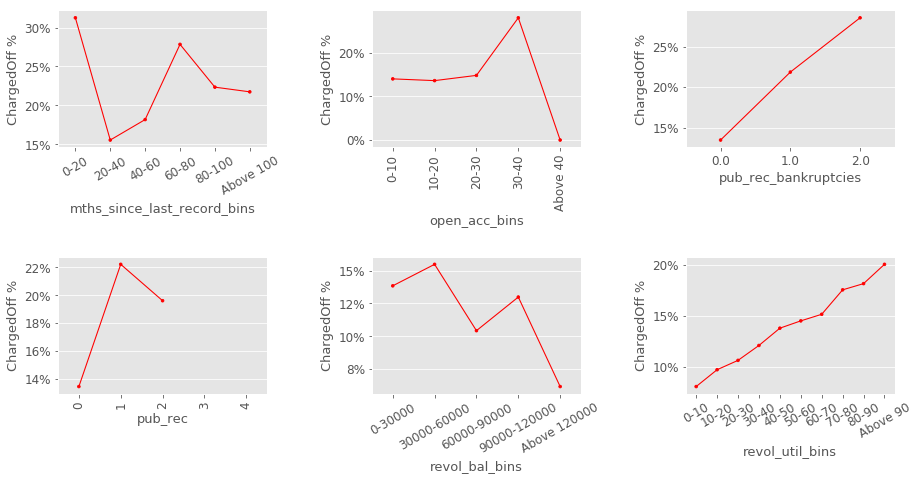

In [80]:
# adjust figure size
plt.figure(figsize=(15, 10))

# subplot 1: 
plt.subplot(3, 3, 1)
# Calculate Charged off % by no of months since last record
ChgOff_mnthLastRcrd= (df[df['loan_status']=='Charged Off'].groupby(by=['mths_since_last_record_bins'])[['loan_status']].count()/\
df.groupby(by=['mths_since_last_record_bins'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(8)
ChgOff_mnthLastRcrd=ChgOff_mnthLastRcrd.reset_index()
ChgOff_mnthLastRcrd.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='mths_since_last_record_bins',y='Charged Off %',data=ChgOff_mnthLastRcrd,color='r',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("mths_since_last_record_bins",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y))) 

# subplot 2: 
plt.subplot(3, 3, 2)
# Calculate Charged off % by no of open accounts
ChgOff_opnAcc= (df[df['loan_status']=='Charged Off'].groupby(by=['open_acc_bins'])[['loan_status']].count()/\
df.groupby(by=['open_acc_bins'])[['loan_status']].count()) 
ChgOff_opnAcc=ChgOff_opnAcc.reset_index()
ChgOff_opnAcc.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='open_acc_bins',y='Charged Off %',data=ChgOff_opnAcc,color='r',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=90)
g.set_xlabel("open_acc_bins",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y))) 

# subplot 3: 
plt.subplot(3, 3, 3)
# Calculate Charged off % by public record bankruptcies
ChgOff_pblcBankrpt= (df[df['loan_status']=='Charged Off'].groupby(by=['pub_rec_bankruptcies'])[['loan_status']].count()/\
df.groupby(by=['pub_rec_bankruptcies'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(8) 
ChgOff_pblcBankrpt=ChgOff_pblcBankrpt.reset_index()
ChgOff_pblcBankrpt.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='pub_rec_bankruptcies',y='Charged Off %',data=ChgOff_pblcBankrpt,color='r',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=0)
g.set_xlabel("pub_rec_bankruptcies",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))

# subplot 4: 
plt.subplot(3, 3, 4)
# Calculate Charged off % by public record
ChgOff_dti= (df[df['loan_status']=='Charged Off'].groupby(by=['pub_rec'])[['loan_status']].count()/\
df.groupby(by=['pub_rec'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(8) 
ChgOff_dti=ChgOff_dti.reset_index()
ChgOff_dti=ChgOff_dti.reset_index()
ChgOff_dti.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='pub_rec',y='Charged Off %',data=ChgOff_dti,color='r',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=90)
g.set_xlabel("pub_rec",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))


# subplot 5: 
plt.subplot(3, 3, 5)
# Calculate Charged off % by revolving balance
ChgOff_revBalance= (df[df['loan_status']=='Charged Off'].groupby(by=['revol_bal_bins'])[['loan_status']].count()/\
df.groupby(by=['revol_bal_bins'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(19)
ChgOff_revBalance=ChgOff_revBalance.reset_index()
ChgOff_revBalance.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='revol_bal_bins',y='Charged Off %',data=ChgOff_revBalance,color='r',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("revol_bal_bins",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))


# subplot 6:
plt.subplot(3, 3, 6)
# Calculate Charged off % by revolving utilization
ChgOff_revUtlz= (df[df['loan_status']=='Charged Off'].groupby(by=['revol_util_bins'])[['loan_status']].count()/\
df.groupby(by=['revol_util_bins'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(19)
ChgOff_revUtlz=ChgOff_revUtlz.reset_index()
ChgOff_revUtlz.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='revol_util_bins',y='Charged Off %',data=ChgOff_revUtlz,color='r',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("revol_util_bins",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))

plt.subplots_adjust(wspace=.5, hspace = 0.8 , top = 1.0)

<font color=blue>Charged Off % for borrower's characteristics is as seen below:-<br /> Month since last record is highest for range 0-20 around 32% <br />Open account is highest for range 30-40 around 28%<br />Public record bankruptcies is highest for value 2 around 27%  <br />Public record is highest for any value above 0 around 20-22%  <br /> Revolving balance is highest for range 0-60000 around 13-16% <br /> Revolving balance utilization shows continuous increment and highest for range above 90% at 20% <br /></font>

### Lets calculate the Charge Off % for more Borrowers characteristics:
#### Additional characteristics like:
##### Month of Loan Issue
##### Number of delinquencies in last 2 years
##### Number of inquiries in last 6 months
##### Number of months since last delinquency

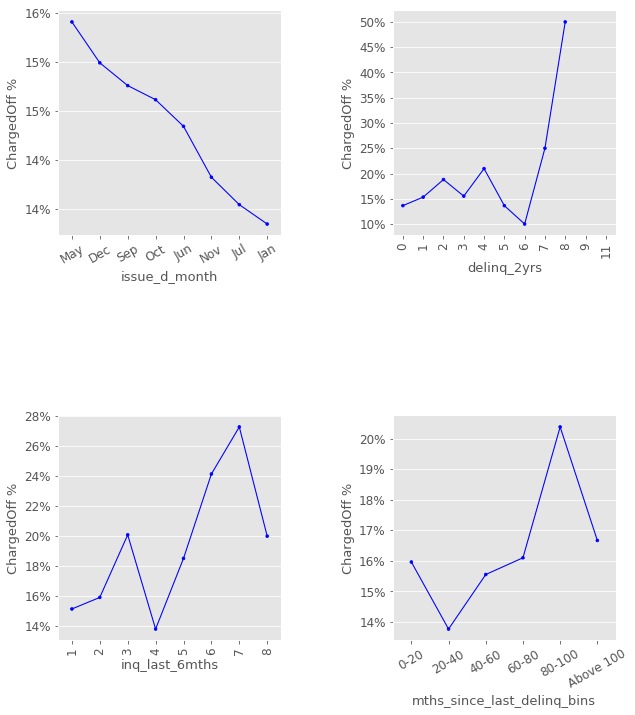

In [81]:
# adjust figure size
plt.figure(figsize=(10, 10))

# subplot 1: 
plt.subplot(2, 2, 1)
# Calculate Charged off % by issued_month
ChgOff_issue= (df[df['loan_status']=='Charged Off'].groupby(by=['issue_d_month'])[['loan_status']].count()/\
df.groupby(by=['issue_d_month'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(8)
ChgOff_issue=ChgOff_issue.reset_index()
ChgOff_issue.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='issue_d_month',y='Charged Off %',data=ChgOff_issue,color='b',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("issue_d_month",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y))) 

# subplot 2: 
plt.subplot(2, 2, 2)
# Calculate Charged off % by delinq within 2yrs
ChgOff_delinq_2yrs= (df[df['loan_status']=='Charged Off'].groupby(by=['delinq_2yrs'])[['loan_status']].count()/\
df.groupby(by=['delinq_2yrs'])[['loan_status']].count()) 
ChgOff_delinq_2yrs=ChgOff_delinq_2yrs.reset_index()
ChgOff_delinq_2yrs.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='delinq_2yrs',y='Charged Off %',data=ChgOff_delinq_2yrs,color='b',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=90)
g.set_xlabel("delinq_2yrs",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y))) 

# subplot 3: 
plt.subplot(2, 2, 3)
# Calculate Charged off % by inq in last months
ChgOff_inq= (df[df['loan_status']=='Charged Off'].groupby(by=['inq_last_6mths'])[['loan_status']].count()/\
df.groupby(by=['inq_last_6mths'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(8) 
ChgOff_inq=ChgOff_inq.reset_index()
ChgOff_inq.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='inq_last_6mths',y='Charged Off %',data=ChgOff_inq,color='b',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=90)
g.set_xlabel("inq_last_6mths",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))


# subplot 4: 
plt.subplot(2, 2, 4)
# Calculate Charged off % by no of months since last delinq
ChgOff_month_last_delinq= (df[df['loan_status']=='Charged Off'].groupby(by=['mths_since_last_delinq_bins'])[['loan_status']].count()/\
df.groupby(by=['mths_since_last_delinq_bins'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(19)
ChgOff_month_last_delinq=ChgOff_month_last_delinq.reset_index()
ChgOff_month_last_delinq.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='mths_since_last_delinq_bins',y='Charged Off %',data=ChgOff_month_last_delinq,color='b',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("mths_since_last_delinq_bins",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))


plt.subplots_adjust(wspace=.5, hspace = 0.8 , top = 1.0)

<font color=blue>Charged Off % for each variable is as seen below:-<br /> It is highest for Loan issued in month of "May & Dec" with charge off rate: around 15-16% <br />It is highest for no of delinquency in last 2 years with value 7 seen with highest charge off rate i.e. 50%<br />No of inquiries with value 6 & 7 seen with highest charge off rate around 24-28%  <br /> No of month since last delinquency with range 80-100 seen with highest charge off rate around 21% i.e. Applicant may not pay loan after showing decent behavior for few months after failing to pay EMI <br /></font>

### Lets calculate the Charge Off % for Lenders parameters
#### Characteristics like:
##### Verification Status
##### Term of loan
##### Grade
##### dti
##### Interest Rate
##### Loan Amount

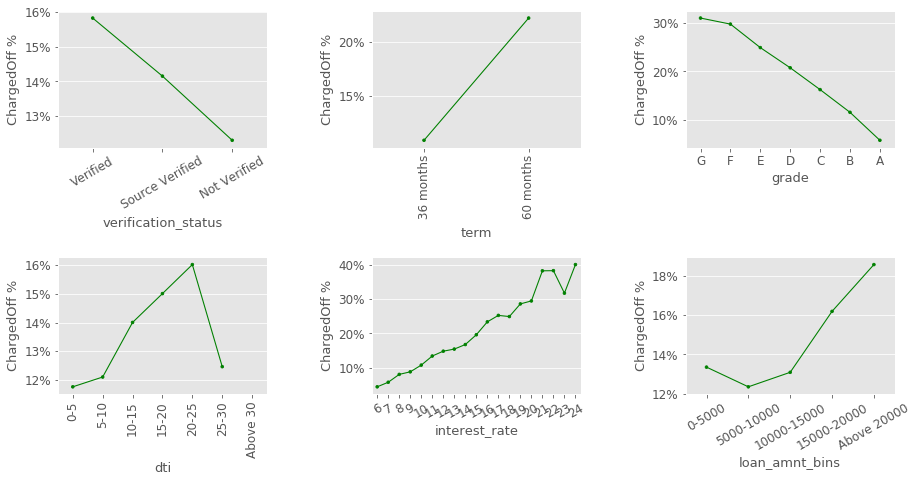

In [82]:
# adjust figure size
plt.figure(figsize=(15, 10))

# subplot 1: 
plt.subplot(3, 3, 1)
# Calculate Charged off % by Verification Status
ChgOff_ver= (df[df['loan_status']=='Charged Off'].groupby(by=['verification_status'])[['loan_status']].count()/\
df.groupby(by=['verification_status'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(8)
ChgOff_ver=ChgOff_ver.reset_index()
ChgOff_ver.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='verification_status',y='Charged Off %',data=ChgOff_ver,color='g',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("verification_status",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y))) 

# subplot 2: 
plt.subplot(3, 3, 2)
# Calculate Charged off % by term
ChgOff_term= (df[df['loan_status']=='Charged Off'].groupby(by=['term'])[['loan_status']].count()/\
df.groupby(by=['term'])[['loan_status']].count()) 
ChgOff_term=ChgOff_term.reset_index()
ChgOff_term.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='term',y='Charged Off %',data=ChgOff_term,color='g',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=90)
g.set_xlabel("term",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y))) 

# subplot 3: 
plt.subplot(3, 3, 3)
# Calculate Charged off % by Grade
ChgOff_grade= (df[df['loan_status']=='Charged Off'].groupby(by=['grade'])[['loan_status']].count()/\
df.groupby(by=['grade'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(8) 
ChgOff_grade=ChgOff_grade.reset_index()
ChgOff_grade=ChgOff_grade.reset_index()
ChgOff_grade.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='grade',y='Charged Off %',data=ChgOff_grade,color='g',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=0)
g.set_xlabel("grade",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))

# subplot 4: 
plt.subplot(3, 3, 4)
# Calculate Charged off % by dti
ChgOff_dti= (df[df['loan_status']=='Charged Off'].groupby(by=['dti_bins'])[['loan_status']].count()/\
df.groupby(by=['dti_bins'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(8) 
ChgOff_dti=ChgOff_dti.reset_index()
ChgOff_dti=ChgOff_dti.reset_index()
ChgOff_dti.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='dti_bins',y='Charged Off %',data=ChgOff_dti,color='g',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=90)
g.set_xlabel("dti",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))


# subplot 5: 
plt.subplot(3, 3, 5)
# Calculate Charged off % by annual Interest Rate
ChgOff_int= (df[df['loan_status']=='Charged Off'].groupby(by=['int_rate'])[['loan_status']].count()/\
df.groupby(by=['int_rate'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(19)
ChgOff_int=ChgOff_int.reset_index()
ChgOff_int.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='int_rate',y='Charged Off %',data=ChgOff_int,color='g',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("interest_rate",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))


# subplot 6:
plt.subplot(3, 3, 6)
# Calculate Charged off % by annual Loan Amount
ChgOff_amnt= (df[df['loan_status']=='Charged Off'].groupby(by=['loan_amnt_bins'])[['loan_status']].count()/\
df.groupby(by=['loan_amnt_bins'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(19)
ChgOff_amnt=ChgOff_amnt.reset_index()
ChgOff_amnt.rename(columns={"loan_status": "Charged Off %"},inplace=True)
g=sns.pointplot(x='loan_amnt_bins',y='Charged Off %',data=ChgOff_amnt,color='g',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("loan_amnt_bins",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))

plt.subplots_adjust(wspace=.5, hspace = 0.8 , top = 1.0)

<font color=blue>Charged Off % for lenders parameters is as seen below:-<br /> It is highest for Verification Status as 'Verified' around 16% <br />It is highest for term of '60 months' around 23%<br />It is highest for grade of 'G' around 30% and there is increase from A to G <br />It is highest for dti range of '20-25' around 16% and shows increase from range of '5-10' to '20-25' <br /> It shows increasing trend for Interest rate with steep increase between 20 to 21% <br /> It shows an increasing trend for Loan Amounts greater than 10,000 with sharp increase after 15000 <br /></font>

### Business Derived Metric: Monthly InHand Savings
### Lets calculate: Monthly InHand Savings available for person after all EMIs deducted from monthly salary
### Monthly InHand Savings Available to applicant after deductions = dti * monthly Salary /100



In [83]:
df['month_inc']=df['annual_inc']/12
df['InHandSalary'] = df['month_inc'] - (df['dti']*df['month_inc']/100)

### Create bins for Monthly InHand Savings available for person after all EMIs deducted from monthly salary

In [84]:
# Lets define the cutpoints by creating a list based on min and the max values
cutpoints = [0, 1000, 2000, 3000, 4000, 5000, 6000, 500000]
# Define the lables
bucket = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000','5000-6000','Above 6000']
# Using the cut function lets create the bins
df['InHandmonth_inc_bins'] = pd.cut(df['InHandSalary'], bins=cutpoints, labels=bucket)

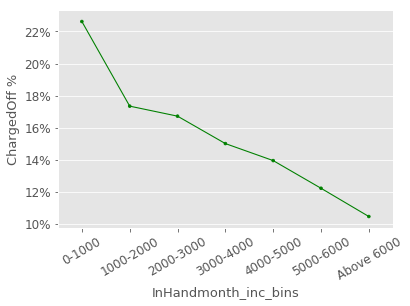

In [85]:
# Calculate Charged off % by Monthly In Hand Income after paying all EMIs
ChgOff_hand= (df[df['loan_status']=='Charged Off'].groupby(by=['InHandmonth_inc_bins'])[['loan_status']].count()/\
df.groupby(by=['InHandmonth_inc_bins'])[['loan_status']].count()).sort_values('loan_status',ascending=False).head(8)
ChgOff_hand=ChgOff_hand.reset_index()
ChgOff_hand.rename(columns={"loan_status": "Charged Off %"},inplace=True)
#plt.figure(figsize=(8,8))
g=sns.pointplot(x='InHandmonth_inc_bins',y='Charged Off %',data=ChgOff_hand,color='g',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("InHandmonth_inc_bins",fontsize=13)
g.set_ylabel("ChargedOff %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y))) 

<font color=blue>This shows that borrower having Monthly InHand Savings in range "0 to 1000" available after deducting all EMIs from monthly salary has highest charge of rate 22%  <br />  <br /></font>

### Data Derived Metric: Non Verification Rate
### Lets calculate the Non Verification Rate across different parameters to check the charge off caused due to non-verification
### Non Verification Rate = Number of Verification status Not Verified by Category/Number of Verification status(all status) by category

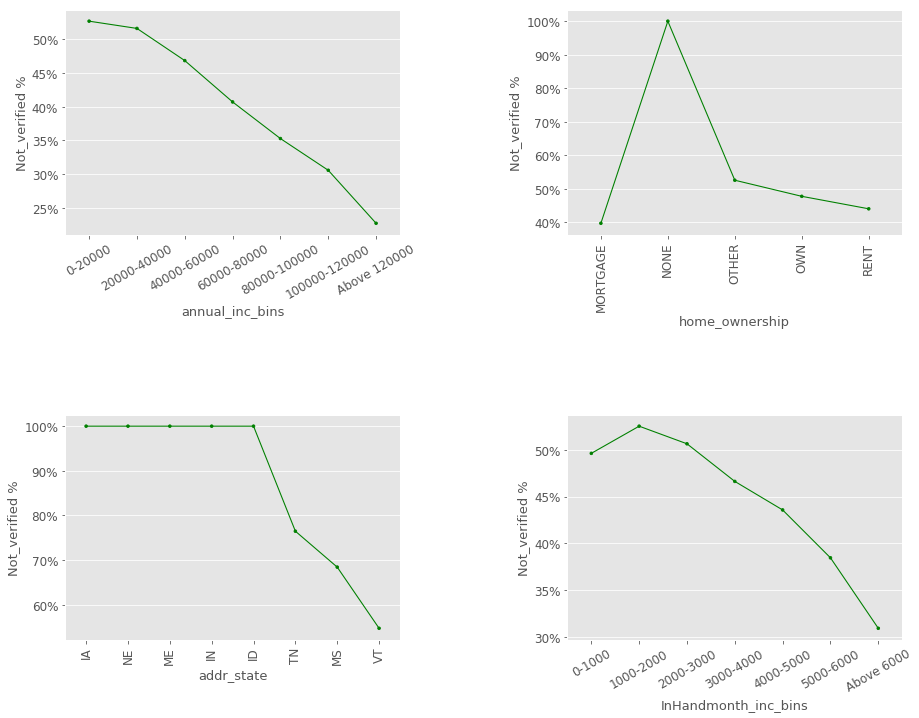

In [86]:
# adjust figure size
plt.figure(figsize=(15, 10))

# subplot 1: 
plt.subplot(2, 2, 1)
# Calculate Verification status rate by no of open accounts
v_annInc= (df[df['verification_status']=='Not Verified'].groupby(by=['annual_inc_bins'])[['verification_status']].count()/\
df.groupby(by=['annual_inc_bins'])[['verification_status']].count()).sort_values('verification_status',ascending=False).head(8)
v_annInc=v_annInc.reset_index()
v_annInc.rename(columns={"verification_status": "verification status %"},inplace=True)
#plt.figure(figsize=(8,8))
g=sns.pointplot(x='annual_inc_bins',y='verification status %',data=v_annInc,color='g',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("annual_inc_bins",fontsize=13)
g.set_ylabel("Not_verified %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y))) 

# subplot 2: 
plt.subplot(2, 2, 2)
# Calculate Verification status rate by home ownership
v_hmOwn= (df[df['verification_status']=='Not Verified'].groupby(by=['home_ownership'])[['verification_status']].count()/\
df.groupby(by=['home_ownership'])[['verification_status']].count()) 
v_hmOwn=v_hmOwn.reset_index()
v_hmOwn.rename(columns={"verification_status": "verification status %"},inplace=True)
#plt.figure(figsize=(5,5))
g=sns.pointplot(x='home_ownership',y='verification status %',data=v_hmOwn,color='g',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=90)
g.set_xlabel("home_ownership",fontsize=13)
g.set_ylabel("Not_verified %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y))) 

# subplot 3: 
plt.subplot(2, 2, 3)
# Calculate Verification status rate by state
v_state= (df[df['verification_status']=='Not Verified'].groupby(by=['addr_state'])[['verification_status']].count()/\
df.groupby(by=['addr_state'])[['verification_status']].count()).sort_values('verification_status',ascending=False).head(8) 
v_state=v_state.reset_index()
v_state.rename(columns={"verification_status": "verification status %"},inplace=True)
g=sns.pointplot(x='addr_state',y='verification status %',data=v_state,color='g',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=90)
g.set_xlabel("addr_state",fontsize=13)
g.set_ylabel("Not_verified %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))


# subplot 4: 
plt.subplot(2, 2, 4)
# Calculate Verification status rate by Monthly InHand Savings (Available Monthly Income after paying all EMIs)
v_InHndIncm= (df[df['verification_status']=='Not Verified'].groupby(by=['InHandmonth_inc_bins'])[['verification_status']].count()/\
df.groupby(by=['InHandmonth_inc_bins'])[['verification_status']].count()).sort_values('verification_status',ascending=False).head(19)
v_InHndIncm=v_InHndIncm.reset_index()
v_InHndIncm.rename(columns={"verification_status": "verification status %"},inplace=True)
#plt.figure(figsize=(8,8))
g=sns.pointplot(x='InHandmonth_inc_bins',y='verification status %',data=v_InHndIncm,color='g',markers=['o'], 
               scale = 0.4)
plt.xticks(rotation=30)
g.set_xlabel("InHandmonth_inc_bins",fontsize=13)
g.set_ylabel("Not_verified %",fontsize=13)
g.tick_params(labelsize=12)
from matplotlib.ticker import FuncFormatter
g.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:,.0%}'.format(y)))


plt.subplots_adjust(wspace=.5, hspace = 0.8 , top = 1.0)

<font color=blue>
Non verification rate is high among following categories which also has very charge off rate:<br />

1) "Annual Income" for low salary bins has more than "50%" non verified rate same low salary bins also has highest charge off rate i.e. approx. "20%"<br />

2) Home ownership with value as "None" for low saraly bins has 100% non verified rate same option i.e. 'None' also has highest charge off rate i.e. approx 20%<br />

3) Address state, e.g "NE" has 100% non verified rate same state "NE" also has highest charge off rate i.e. "60%"<br />

4) Monthly InHand Savings("Monthly Income left after paying all EMIs") has more than 50% non verified rate for values 0 to 3000 same values also has highest charge off rate i.e. 15 to 25%
 <br />  
 <b>To summarize, if we check the charge off% plot with the parameters 'Annual Income', 'Home ownership', 'Address state' and 'Monthly InHand Savings' (Monthly Income left after paying all EMIs) it is clear that the charge off% is higher for sections/values/ranges where non-verification rate is high</b>
 </font>

<font color=blue><b>We have also seen in previous plots that Charge off rate is highest among verified borrower  <br />  Looking at above plot, Finance company should improve borrower verification process</b><br /></font>

# Summary

<font color=blue>Thus, the loan company should look at the below Driver variables based on the Charge Off % <br />    <b>Home Ownership</b> for RENT <br /><b>Emp Length</b> for 10+ yrs <br /><b>Addr State</b> for NE  <br /><b>Purpose</b> for small_business. <br /> <b>Annual Income</b> for income range 0-20000 <br />   <br /> <b>Verification Status</b> for Verified <br /><b>Term</b> for loan in 60 months <br /><b>Grade</b> escpecially G <br /><b>dti range</b> from 5-10 till 20-25 <br /> <b>Interest rate</b> greater than 20% <br /> <b>Loan Amounts</b> greater than 10,000  <br /><br /> <b>Month since last record</b> in range 0-20 which has highest charge off around 32% <br /><b>Open accounts</b> in range 30-40 which has highest charge off around 28%<br /><b>Public record bankruptcies</b> for value 2 which has highest charge off around 27%  <br /><b>Public record</b> for any value above 0 which has highest charge off around 20-22%  <br /> <b>Revolving balance</b> in range 0-60000 which has highest charge off around 13-16% <br /> <b>Revolving balance utilization</b> for range above 90% as it shows continuous increment for charge off and is highest at 20% <br /><br /> <b>Loan issued in month</b> of "May & Dec" seen with highest charge off rate: around 15-16% <br /><b>No of delinquency in last 2 years</b> with value 7 seen with highest charge off rate i.e. 50%<br /><b>No of inquiries in last 6 months</b> with value 6 & 7 seen with highest charge off rate around 24-28%  <br /> <b>No of month since last delinquency</b> with range 80-100 seen with highest charge off rate around 21% i.e. Applicant may not pay loan after showing decent behavior for few months after failing to pay EMI <br />Borrower having <b>Monthly InHand Savings</b> range "0 to 1000" available after all EMIs deducted from monthly salary has highest charge of rate 22%  <br />  </font>

<font color=blue>Finance company should improve borrower verfication process to minimize loss<br /></font>